# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Maya Hazem  

ID: 55-1360  

Tutorial: T07

---

Name: Hania Ismail

ID: 55-4336

Tutorial: T07

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [14]:
df.describe()



,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


describe here

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


describe info here

In [16]:
df.shape

(46578, 15)

describe

In [17]:
df.isnull()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46574,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46575,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46576,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


desc

In [18]:
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


desc

In [20]:
df.dtypes

,0
year,int64
make,object
model,object
trim,object
body,object
transmission,object
vin,object
state,object
condition,float64
odometer,object


desc

In [22]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
46573,False
46574,False
46575,False
46576,False


desc

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [30]:
df['make'].str.strip()

,make
0,Hyundai
1,Toyota
2,Lexus
3,BMW
4,Ford
...,...
46573,Ford
46574,Infiniti
46575,BMW
46576,Toyota


In [31]:
df['model'].str.strip()

,model
0,Sonata
1,4Runner
2,IS 250
3,X5
4,E-Series Van
...,...
46573,Edge
46574,G Sedan
46575,3 Series
46576,Camry


In [32]:
df['trim'].str.strip()

,trim
0,GLS
1,SR5
2,Base
3,4.4i
4,E-250
...,...
46573,SE
46574,G37 Journey
46575,328i
46576,LE


In [ ]:
df['body'].str.strip()

In [33]:
df['transmission'].str.strip()

,transmission
0,automatic
1,automatic
2,automatic
3,automatic
4,automatic
...,...
46573,automatic
46574,automatic
46575,automatic
46576,automatic


In [34]:
df['vin'].str.strip()

,vin
0,5npeb4acxdh702805
1,jtezu5jr2e5064567
2,jthbf5c24c5168599
3,5uxfb33562lh33864
4,1ftne2ew0eda31832
...,...
46573,2fmdk4gc2dbc03247
46574,jn1cv6ap9cm623162
46575,wba3a5c56df356614
46576,4t1bf1fk8du254684


In [35]:
df['state'].str.strip()

,state
0,ma
1,fl
2,fl
3,fl
4,wa
...,...
46573,va
46574,ca
46575,tx
46576,ca


In [37]:
df['odometer'].str.strip()

,odometer
0,50404.0mi
1,17846.0mi
2,21122.0mi
3,145303.0mi
4,6714.0mi
...,...
46573,52844.0mi
46574,23185.0mi
46575,45357.0mi
46576,43376.0mi


In [38]:
df['color'].str.strip()

,color
0,black
1,gray
2,silver
3,black
4,white
...,...
46573,—
46574,black
46575,white
46576,black


In [39]:
df['interior'].str.strip()

,interior
0,gray
1,—
2,black
3,black
4,gray
...,...
46573,gray
46574,black
46575,beige
46576,beige


In [40]:
df['seller'].str.strip()

,seller
0,the hertz corporation
1,award auto sales and leasing inc
2,lexus financial services
3,peddle llc
4,u-haul
...,...
46573,wheels exchange llc
46574,nissan infiniti lt
46575,motorcars of south texas
46576,avis rac/san leandro


In [41]:
df['sellingprice'].str.strip()

,sellingprice
0,$10900
1,$29900
2,$24200
3,$3200
4,$22100
...,...
46573,$17000
46574,$21500
46575,$22000
46576,$13800


In [42]:
df['saledate'].str.strip()

,saledate
0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...
46573,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [43]:
df['make'].str.lower()

,make
0,hyundai
1,toyota
2,lexus
3,bmw
4,ford
...,...
46573,ford
46574,infiniti
46575,bmw
46576,toyota


In [44]:
df['model'].str.lower()

,model
0,sonata
1,4runner
2,is 250
3,x5
4,e-series van
...,...
46573,edge
46574,g sedan
46575,3 series
46576,camry


In [45]:
df['trim'].str.lower()

,trim
0,gls
1,sr5
2,base
3,4.4i
4,e-250
...,...
46573,se
46574,g37 journey
46575,328i
46576,le


In [46]:
df['body'].str.lower()

,body
0,sedan
1,suv
2,sedan
3,suv
4,e-series van
...,...
46573,suv
46574,g sedan
46575,sedan
46576,sedan


In [47]:
df['transmission'].str.lower()

,transmission
0,automatic
1,automatic
2,automatic
3,automatic
4,automatic
...,...
46573,automatic
46574,automatic
46575,automatic
46576,automatic


In [48]:
df['vin'].str.lower()

,vin
0,5npeb4acxdh702805
1,jtezu5jr2e5064567
2,jthbf5c24c5168599
3,5uxfb33562lh33864
4,1ftne2ew0eda31832
...,...
46573,2fmdk4gc2dbc03247
46574,jn1cv6ap9cm623162
46575,wba3a5c56df356614
46576,4t1bf1fk8du254684


In [49]:
df['state'].str.lower()

,state
0,ma
1,fl
2,fl
3,fl
4,wa
...,...
46573,va
46574,ca
46575,tx
46576,ca


In [50]:
df['odometer'].str.lower()

,odometer
0,50404.0mi
1,17846.0mi
2,21122.0mi
3,145303.0mi
4,6714.0mi
...,...
46573,52844.0mi
46574,23185.0mi
46575,45357.0mi
46576,43376.0mi


In [51]:
df['color'].str.lower()

,color
0,black
1,gray
2,silver
3,black
4,white
...,...
46573,—
46574,black
46575,white
46576,black


In [52]:
df['interior'].str.lower()

,interior
0,gray
1,—
2,black
3,black
4,gray
...,...
46573,gray
46574,black
46575,beige
46576,beige


In [53]:
df['seller'].str.lower()

,seller
0,the hertz corporation
1,award auto sales and leasing inc
2,lexus financial services
3,peddle llc
4,u-haul
...,...
46573,wheels exchange llc
46574,nissan infiniti lt
46575,motorcars of south texas
46576,avis rac/san leandro


In [54]:
df['sellingprice'].str.lower()

,sellingprice
0,$10900
1,$29900
2,$24200
3,$3200
4,$22100
...,...
46573,$17000
46574,$21500
46575,$22000
46576,$13800


In [55]:
df['saledate'].str.lower()

,saledate
0,tue jun 02 2015 02:30:00 gmt-0700 (pdt)
1,wed feb 18 2015 07:15:00 gmt-0800 (pst)
2,tue jan 20 2015 01:30:00 gmt-0800 (pst)
3,wed mar 04 2015 07:10:00 gmt-0800 (pst)
4,wed feb 18 2015 06:45:00 gmt-0800 (pst)
...,...
46573,wed jan 07 2015 09:30:00 gmt-0800 (pst)
46574,thu jun 18 2015 05:30:00 gmt-0700 (pdt)
46575,wed feb 18 2015 02:00:00 gmt-0800 (pst)
46576,wed jan 14 2015 04:30:00 gmt-0800 (pst)


In [56]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
46573,False
46574,False
46575,False
46576,False


In [59]:
df['year'].value_counts()

,count
year,
2013,8682
2012,8448
2014,6887
2011,4072
2008,2646
2007,2466
2010,2254
2006,2168
2009,1826


In [60]:
df['make'].value_counts()

,count
make,
Ford,7871
Chevrolet,5322
Nissan,4297
Toyota,3474
Dodge,2718
Honda,2403
Hyundai,1801
BMW,1680
Kia,1639


In [61]:
df['model'].value_counts()

,count
model,
Altima,1610
F-150,1179
Fusion,1115
Camry,1081
Escape,1063
...,...
TTS,1
Safari,1
Sierra 1500 Hybrid,1


In [62]:
df['trim'].value_counts()

,count
trim,
Base,4851
SE,3940
LX,1912
Limited,1506
LT,1501
...,...
Formula,1
318i,1
Turbo PZEV,1


In [63]:
df['body'].value_counts()

,count
body,
Sedan,17171
SUV,9942
sedan,3686
suv,1994
Hatchback,1869
...,...
CTS Wagon,1
granturismo convertible,1
promaster cargo van,1


In [64]:
df['transmission'].value_counts()

,count
transmission,
automatic,44928
manual,1650


In [65]:
df['vin'].value_counts()

,count
vin,
5npeb4acxdh702805,1
4t4bf1fk7cr200717,1
4t1bf1fk5eu756747,1
1c4rjfcg0cc176579,1
1ftrx14w68kd18180,1
...,...
jn8az18u19w020683,1
jn1cv6ar9bm411071,1
jn8af5mv2dt206502,1


In [66]:
df['state'].value_counts()

,count
state,
fl,7451
ca,6440
tx,4056
ga,3008
nj,2302
pa,2287
il,2082
oh,1984
tn,1891


In [67]:
df['condition'].value_counts()

,count
condition,
1.9,3651
3.5,2239
3.7,2227
4.3,2135
4.2,2130
4.4,2112
3.6,2058
4.1,1971
2.9,1715


In [68]:
df['odometer'].value_counts()

,count
odometer,
1.0mi,86
30600.0mi,6
34864.0mi,6
36265.0mi,5
10120.0mi,5
...,...
143487.0mi,1
43249.0mi,1
47075.0mi,1


In [69]:
df['color'].value_counts()

,count
color,
black,9156
white,8693
gray,7046
silver,6982
blue,4244
red,3685
—,2246
gold,948
green,891


In [70]:
df['interior'].value_counts()

,count
interior,
black,20734
gray,15020
beige,4917
tan,3777
—,988
brown,694
blue,101
red,92
silver,88


In [71]:
df['seller'].value_counts()

,count
seller,
"ford motor credit company,llc",1733
the hertz corporation,1561
nissan-infiniti lt,1514
santander consumer,1425
avis corporation,1158
...,...
hg motor company llc,1
orlando mini,1
braddock motors llc,1


In [72]:
df['sellingprice'].value_counts()

,count
sellingprice,
$12000,397
$11000,374
$14000,353
$10000,345
$13000,342
...,...
$52600,1
$48600,1
$63500,1


In [73]:
df['saledate'].value_counts()

,count
saledate,
Tue Feb 10 2015 01:30:00 GMT-0800 (PST),490
Tue Jan 27 2015 01:30:00 GMT-0800 (PST),477
Tue Jan 20 2015 01:30:00 GMT-0800 (PST),471
Tue Mar 03 2015 01:30:00 GMT-0800 (PST),425
Tue Feb 03 2015 01:30:00 GMT-0800 (PST),421
...,...
Tue Feb 24 2015 00:00:00 GMT-0800 (PST),1
Mon Feb 23 2015 00:31:00 GMT-0800 (PST),1
Fri Mar 06 2015 05:00:00 GMT-0800 (PST),1


In [81]:
df['color'] = df['color'].str.replace('—', 'unspecified')

In [85]:
df['saledate'] = pd.to_datetime(df['saledate'])


<ipython-input-85-24cc194b34ee>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'])
<ipython-input-85-24cc194b34ee>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['saledate'] = pd.to_datetime(df['saledate'])


In [86]:
df['saledate'].value_counts()

,count
saledate,
2015-02-10 01:30:00+08:00,490
2015-01-27 01:30:00+08:00,477
2015-01-20 01:30:00+08:00,471
2015-03-03 01:30:00+08:00,425
2015-02-03 01:30:00+08:00,421
...,...
2015-02-24 00:00:00+08:00,1
2015-02-23 00:31:00+08:00,1
2015-03-06 05:00:00+08:00,1


In [110]:
df['sellingprice'] = df['sellingprice'].astype(str).str.replace('$', '')

In [112]:
df['sellingprice'] = df['sellingprice'].astype(float)


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  float64
 14  saledate      46578 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 5.3+ MB


In [115]:
df['sellingprice'].value_counts()

,count
sellingprice,
12000.0,397
11000.0,374
14000.0,353
10000.0,345
13000.0,342
...,...
52600.0,1
48600.0,1
63500.0,1


In [124]:
df['odometer'] = df['odometer'].astype(str).str.replace('mi', '')

In [125]:
df['odometer'] = df['odometer'].astype(float)


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  float64
 14  saledate      46578 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 5.3+ MB


In [127]:
df['odometer'].value_counts()

,count
odometer,
1.0,86
30600.0,6
34864.0,6
36265.0,5
10120.0,5
...,...
143487.0,1
43249.0,1
47075.0,1


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


In [82]:
df['color'].value_counts()

,count
color,
black,9156
white,8693
gray,7046
silver,6982
blue,4244
red,3685
unspecified,2246
gold,948
green,891


**Visualization**

<Axes: xlabel='color', ylabel='count'>

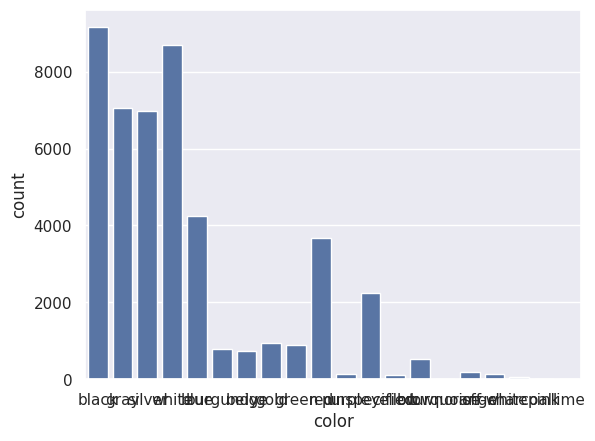

In [89]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

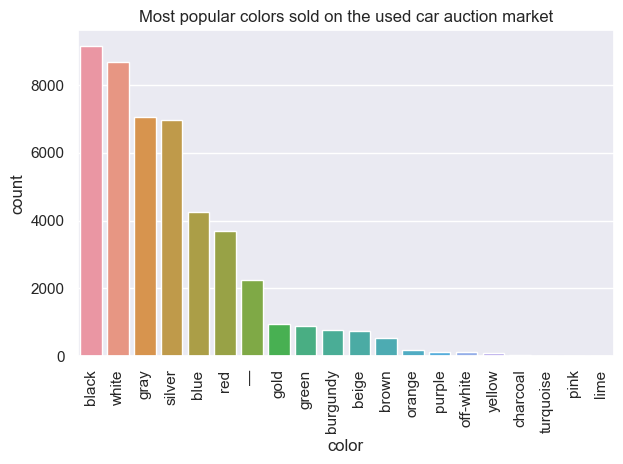

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

<ipython-input-93-aab4aeae2eeb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='make', data=df, order=make_order, palette=custom_colors)


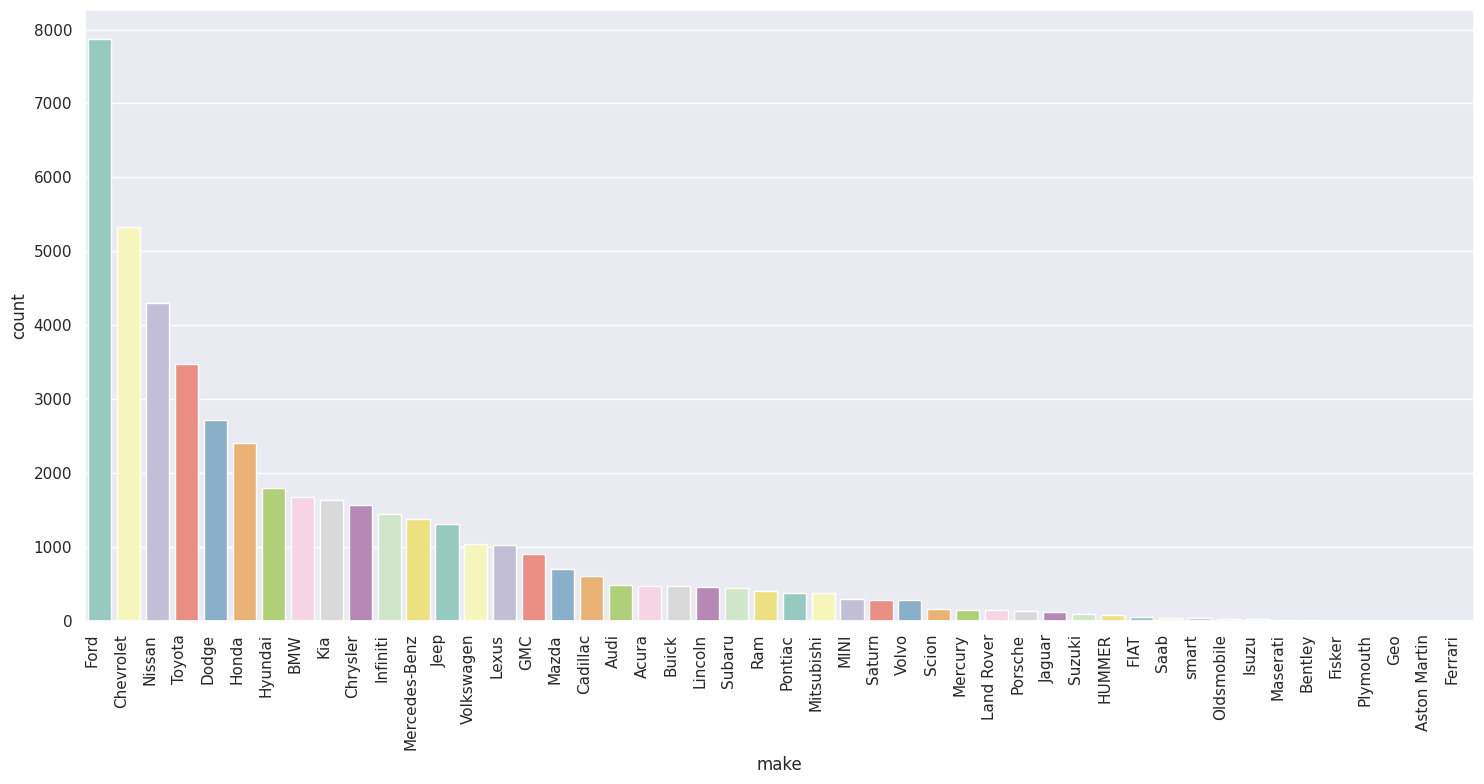

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the dataframe by 'make' counts in descending order
make_order = df['make'].value_counts().index

# Create a custom color palette
custom_colors = sns.color_palette("Set3", n_colors=len(make_order))

# Set the figure size (adjust as needed)
plt.figure(figsize=(15, 8))  # Width of 15, height of 8 to avoid label overlap

# Create the countplot with the custom color palette and sorted order
sns.countplot(x='make', data=df, order=make_order, palette=custom_colors)

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=90, ha='right')  # Rotate 90 degrees and align labels to the right

# Display the plot with a tight layout
plt.tight_layout()
plt.show()


**Answer for Q1**: Your answer here

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

<ipython-input-100-a5961b595330>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='transmission', y='sellingprice', data=df, palette='muted', inner=None, alpha=0.6)


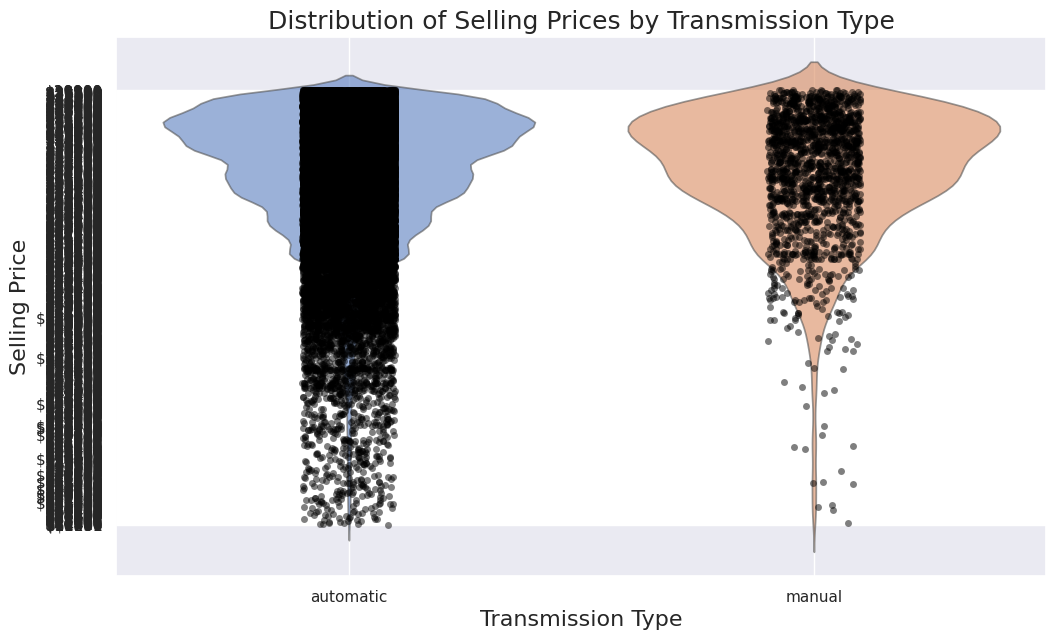

In [100]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better clarity
plt.figure(figsize=(12, 7))

# Create the violin plot with enhancements
sns.violinplot(x='transmission', y='sellingprice', data=df, palette='muted', inner=None, alpha=0.6)

# Overlay jittered points
sns.stripplot(x='transmission', y='sellingprice', data=df, color='black', alpha=0.5, jitter=True)

# Add titles and labels
plt.title('Distribution of Selling Prices by Transmission Type', fontsize=18)
plt.xlabel('Transmission Type', fontsize=16)
plt.ylabel('Selling Price', fontsize=16)
plt.grid(True)  # Add grid for better readability
plt.show()  # Show the plot


**Answer for Q2**: The distribution for automatic cars shows a wider range of prices and a higher concentration of higher prices compared to the manual cars.The median line for automatic cars is positioned higher than that of manual cars, indicating that the typical selling price for automatic vehicles is greater. The automatic cars tend to have more cars at the higher price points, while manual cars have a noticeable concentration at lower prices.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

<ipython-input-107-91e51696504d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='make', y='sellingprice', palette='Set3')  # Change color palette


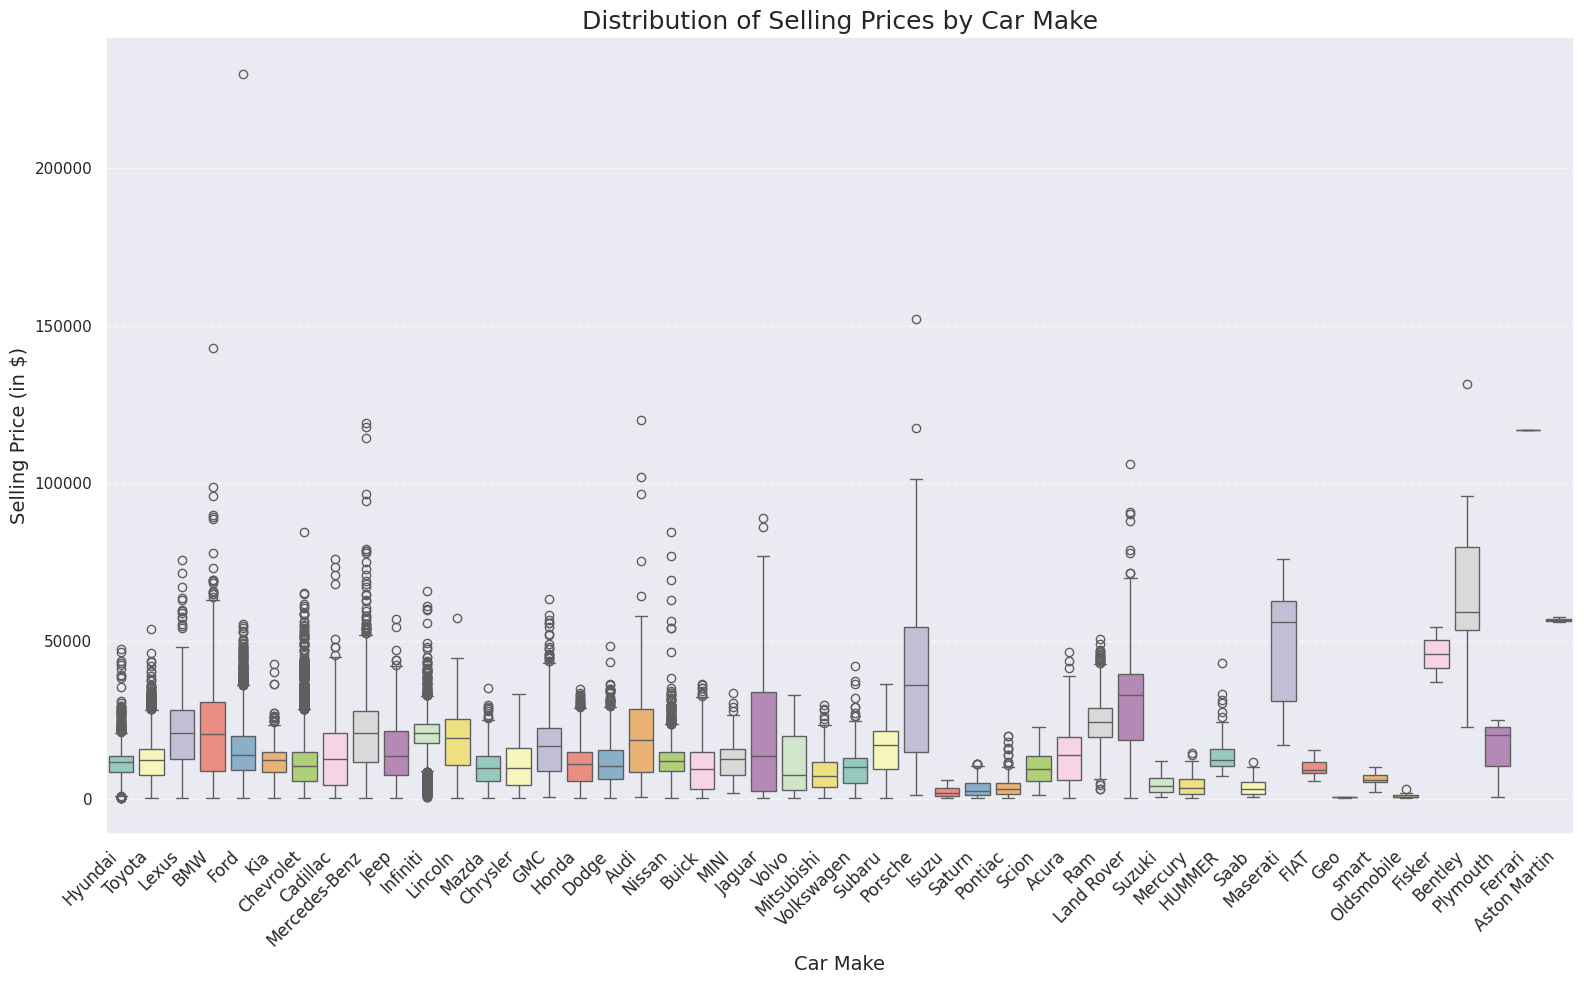

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['sellingprice'] = df['sellingprice'].replace({'\$': ''}, regex=True).astype(float)

# Create the box plot
plt.figure(figsize=(16, 10))  # Increased figure size for better spacing
sns.boxplot(data=df, x='make', y='sellingprice', palette='Set3')  # Change color palette

# Customize the title and labels
plt.title('Distribution of Selling Prices by Car Make', fontsize=18)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Selling Price (in $)', fontsize=14)

# Improve x-ticks spacing
plt.xticks(rotation=45, ha='right', fontsize=12)  # Align x-tick labels to the right for clarity

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Answer for Q3**: Your answer here

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

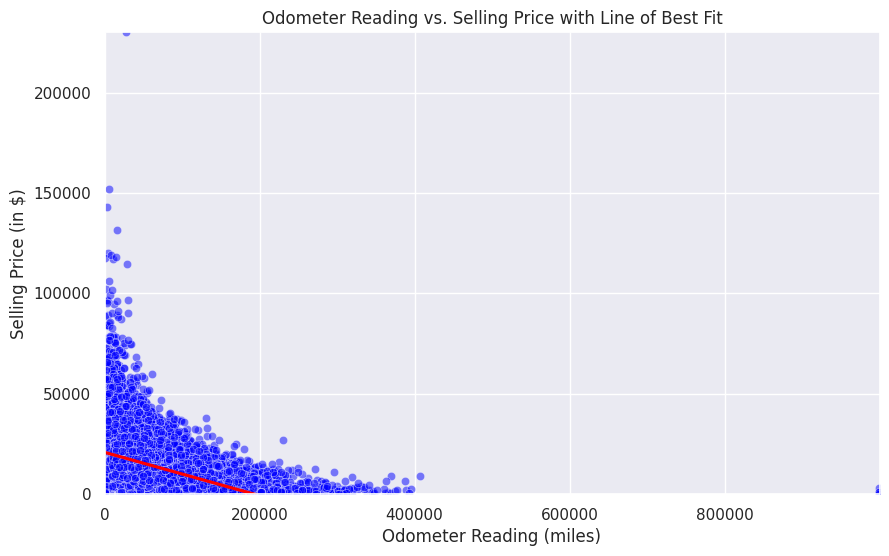

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample DataFrame creation for demonstration
# df = pd.read_csv('your_data.csv')  # Uncomment to load your dataset

# Visualization: Odometer Reading vs. Selling Price with Line of Best Fit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='sellingprice', color='blue', alpha=0.5)
sns.regplot(data=df, x='odometer', y='sellingprice', scatter=False, color='red')
plt.title('Odometer Reading vs. Selling Price with Line of Best Fit')
plt.xlabel('Odometer Reading (miles)')
plt.ylabel('Selling Price (in $)')
plt.xlim(0, df['odometer'].max())
plt.ylim(0, df['sellingprice'].max())
plt.show()



**Answer for Q4**: Your answer here

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

**Answer for Q5**: Your answer here

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

**Answer for Q6**: Your answer here

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

## Modelling

_Apply the linear regression model below._

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.